In [ ]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

#Generate synthetic regression data
X, y=make_regression(n_samples=100, n_features=1, noise=15, random_state=42)

#Initialize the linear regression
model=LinearRegression()

#K-fold cross validation with K=5
kf=KFold(n_splits=5, shuffle=True, random_state=42)

#Evaluate the model using cross-validation
cv_scores=cross_val_score(model, X, y, cv=kf, scoring='r2')

#Display the result
print("Cross-validation score(R2 for each fold):", cv_scores)
print("Mean R2 Score:", np.mean(cv_scores))
print("Standard Deviation of R2 Scores:", np.std(cv_scores))

Cross-validation score(R2 for each fold): [0.87419982 0.93968511 0.93977012 0.8619573  0.82359509]
Mean R2 Score: 0.8878414894595993
Standard Deviation of R2 Scores: 0.04553686591326519


Bias Variance Trade offs in CV

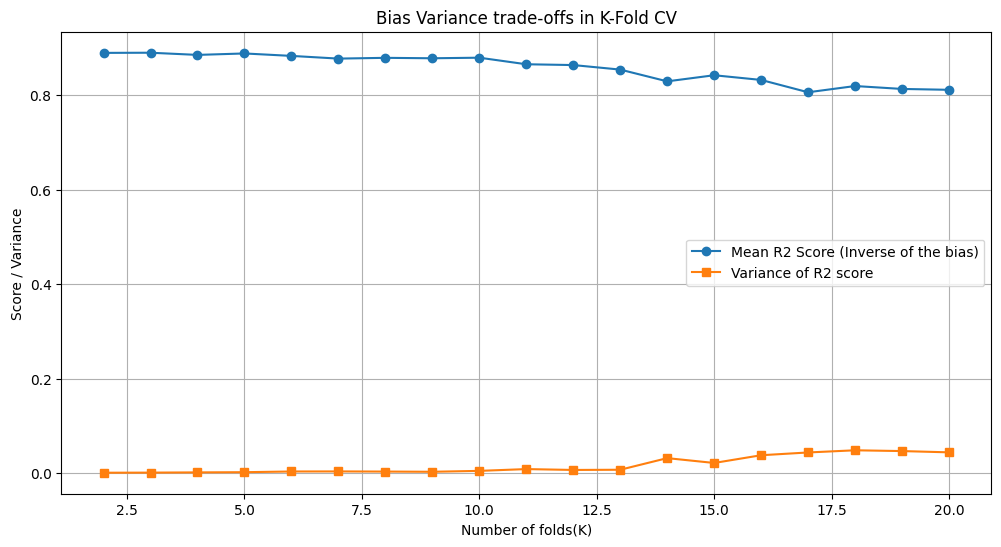

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

#Generate synthetic regression data
X, y=make_regression(n_samples=100, n_features=1, noise=15, random_state=42)

#Initialize the linear regression
model=LinearRegression()

#Test different K values
k_values=range(2, 21)
mean_scores=[]
variance_scores=[]

#Perform the cross-validation for each k value
for k in k_values:
  kf=KFold(n_splits=k, shuffle= True, random_state=42)
  scores=cross_val_score(model, X, y, cv=kf, scoring='r2')
  mean_scores.append(np.mean(scores))
  variance_scores.append(np.var(scores))

#Plot the bias variance trade-offs
plt.figure(figsize=(12,6))
plt.plot(k_values, mean_scores, label='Mean R2 Score (Inverse of the bias)', marker='o')
plt.plot(k_values, variance_scores, label='Variance of R2 score', marker='s')

plt.xlabel('Number of folds(K)')
plt.ylabel('Score / Variance')
plt.title('Bias Variance trade-offs in K-Fold CV')
plt.legend()
plt.grid(True)
plt.show()